# 3-2. Dimensionality Reduction


## Load Datasets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
# Breast cancer dataset
cancer = load_breast_cancer()

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
print(X_cancer, y_cancer)
print(X_cancer.shape)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# fruits classification dataset
fruits = pd.read_table('/content/drive/MyDrive/Colab Notebooks/data/fruit_data_with_colors.txt')
print(fruits.head())
X_fruits = np.asarray(fruits[['mass','width','height', 'color_score']])
y_fruits = np.asarray(fruits[['fruit_label']] - 1)
print(X_fruits)
print(fruits[['fruit_label']] - 1)

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
[[192.     8.4    7.3    0.55]
 [180.     8.     6.8    0.59]
 [176.     7.4    7.2    0.6 ]
 [ 86.     6.2    4.7    0.8 ]
 [ 84.     6.     4.6    0.79]
 [ 80.     5.8    4.3    0.77]
 [ 80.     5.9    4.3    0.81]
 [ 76.     5.8    4.     0.81]
 [178.     7.1    7.8    0.92]
 [172.     7.4    7.     0.89]
 [166.     6.9    7.3    0.93]
 [172.     7.1    7.6    0.92]
 [154.     7.     7.1    0.88]
 [164.     7.3    7.7    0.7 ]
 [152.     7.6    7.3    0.69]
 [156.     7.7    7.1    0.69]
 [156.     7.6    7.5    0.67]
 [168.     7.5    7.6    0.73

**굵은 텍스트**## Principal Components Analysis (PCA)

In [ ]:
# Principal Components Analysis (PCA)
# Using PCA to find the first two principal components of the breast cancer dataset
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer

# Before applying PCA, each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

print(X_cancer.shape, X_pca.shape)

(569, 30) (569, 2)


In [ ]:
# import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    # plt.show()

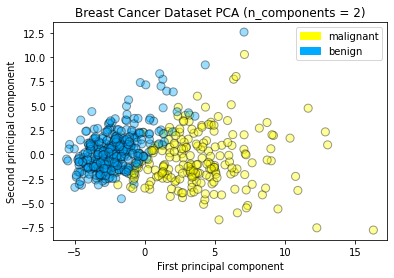

In [ ]:
# Plotting the PCA-transformed version of the breast cancer dataset
plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

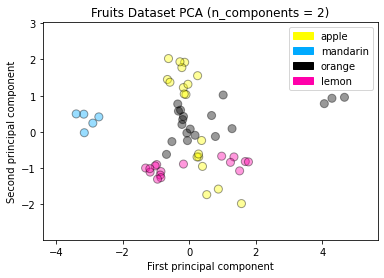

In [ ]:
# PCA on the fruit dataset (for comparison)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  
pca = PCA(n_components = 2).fit(X_normalized)
X_pca = pca.transform(X_normalized)

plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

## Multidimensional scaling (MDS) 

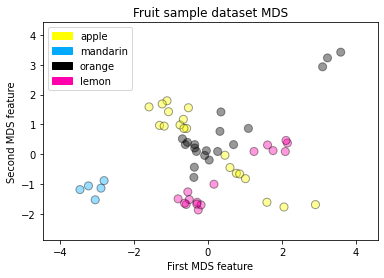

In [ ]:
# Multidimensional scaling (MDS) on the fruit dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS

# each feature should be centered (zero mean) and with unit variance
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  

mds = MDS(n_components = 2)

X_fruits_mds = mds.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_fruits_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS feature')
plt.ylabel('Second MDS feature')
plt.title('Fruit sample dataset MDS');

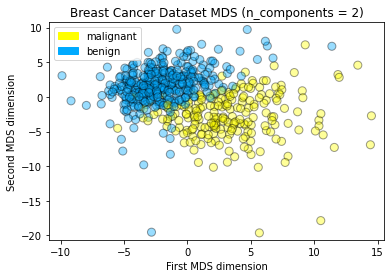

In [ ]:
# Multidimensional scaling (MDS) on the breast cancer dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

# each feature should be centered (zero mean) and with unit variance
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)  

mds = MDS(n_components = 2)

X_mds = mds.fit_transform(X_normalized)

plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])

plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');

## t-SNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


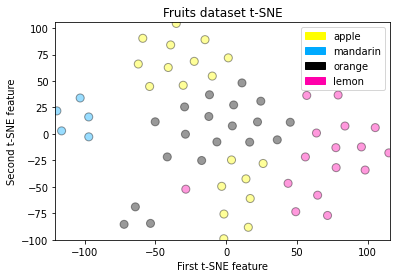

In [ ]:
# t-SNE on the fruit dataset
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
X_fruits_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)  
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_fruits_normalized)

plot_labelled_scatter(X_tsne, y_fruits, 
    ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits dataset t-SNE');

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


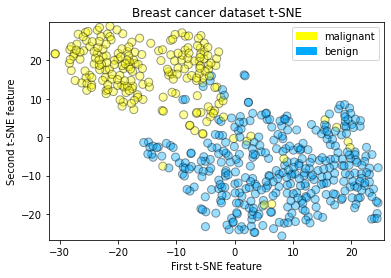

In [ ]:
# t-SNE on the breast cancer dataset
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_normalized)

plot_labelled_scatter(X_tsne, y_cancer, 
    ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast cancer dataset t-SNE');